In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

np.random.seed(3)

(X_train, Y_train), (X_test_org, Y_test_org) = fashion_mnist.load_data()


In [14]:
X_val = X_train[3000:4000]
Y_val = Y_train[3000:4000]
X_train = X_train[:3000]
Y_train = Y_train[:3000]
X_test = X_test_org[:1000]
Y_test = Y_test_org[:1000]

X_train = X_train.reshape(3000, 28,28,1).astype('float32') / 255.0
X_val = X_val.reshape(1000, 28,28,1).astype('float32') / 255.0
X_test = X_test.reshape(1000, 28,28,1).astype('float32') / 255.0


In [15]:
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

In [16]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
hist = model.fit(X_train, Y_train, epochs=20, batch_size=10, validation_data=(X_val, Y_val))

print('Mean Accuracy: ',np.mean(hist.history['acc']))
print('Mean Loss: ',np.mean(hist.history['loss']))
print('Mean Val Accuracy: ',np.mean(hist.history['val_acc']))
print('Mean Val Loss: ',np.mean(hist.history['val_loss']))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

1000/1000 [==============================] - 0s 163us/sample - loss: 0.4360 - acc: 0.8530
Test loss: 0.4360296154767275
Test accuracy: 0.853


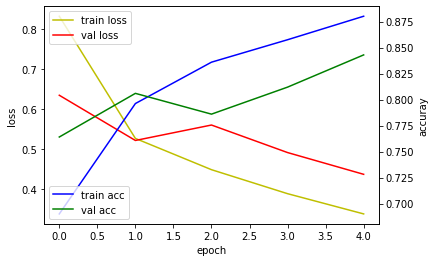

In [17]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=10)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [18]:
(OX_train, OY_train), (OX_test, OY_test) = mnist.load_data()
OX_test = OX_test[:1000]

OX_test_reshape = OX_test.reshape(1000, 28,28,1).astype('float32') / 255.0

predictions = model.predict(OX_test_reshape)

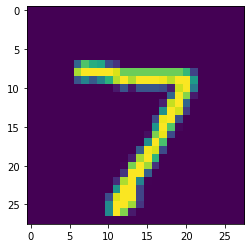

[2.75167614e-01 4.04368900e-02 9.02145170e-03 6.28017122e-03
 7.48685969e-04 4.57041897e-02 2.83493251e-01 1.15388146e-04
 3.38783890e-01 2.48567114e-04]


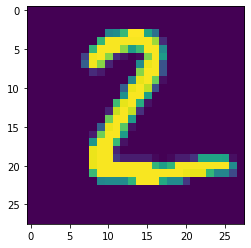

[1.60896536e-02 7.06723193e-04 1.28295226e-03 8.83755028e-01
 1.15684263e-04 4.54365480e-04 1.10333767e-02 1.21878526e-04
 8.61089304e-02 3.31400981e-04]


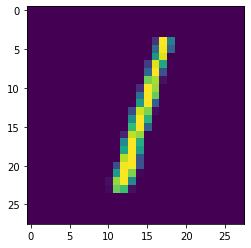

[1.2615540e-03 8.5257328e-01 1.9716621e-04 8.7183349e-02 2.4392377e-04
 3.2995080e-04 1.2732042e-02 8.3106162e-04 4.0558536e-02 4.0892148e-03]


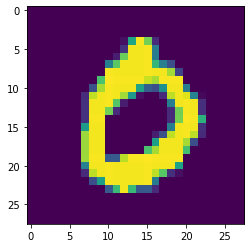

[6.3981549e-03 1.9853770e-04 5.3184982e-02 1.7529157e-03 4.4676289e-03
 1.8026094e-01 2.8105529e-03 1.0544232e-05 7.5090700e-01 8.7306362e-06]


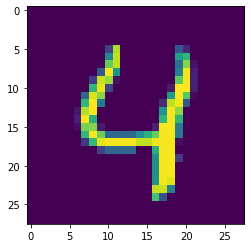

[2.3376079e-02 3.5224475e-05 3.9176755e-03 6.3470005e-05 1.1242642e-02
 2.8311883e-03 7.7902470e-03 4.9843857e-06 9.5073813e-01 3.5170999e-07]


In [19]:
for i in range(5):
    plt.imshow(OX_test[i])
    plt.show()
    print(predictions[i])

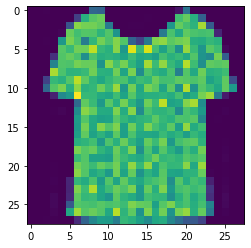

Original:  0
Predicted probabilities:  [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 7.075097e-30 0.000000e+00 0.000000e+00 0.000000e+00]
Predicted Y:  0


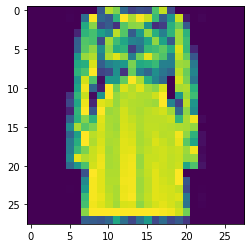

Original:  3
Predicted probabilities:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted Y:  3


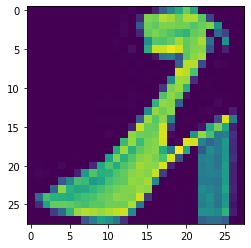

Original:  5
Predicted probabilities:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Predicted Y:  5


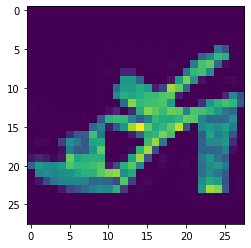

Original:  5
Predicted probabilities:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Predicted Y:  5


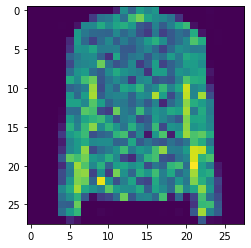

Original:  6
Predicted probabilities:  [0.000000e+00 0.000000e+00 4.729748e-21 0.000000e+00 0.000000e+00
 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
Predicted Y:  6


In [22]:
Outlier_test = X_test_org[1000:2000]
Outlier_test = Outlier_test.reshape(1000,28,28,1)
Xpredictions = model.predict(Outlier_test)

for i in range(1000,1005):
    plt.imshow(X_test_org[i])
    plt.show()
    print ("Original: ",Y_test_org[i])
    print("Predicted probabilities: ",Xpredictions[i-1000])
    print("Predicted Y: ",np.argmax(Xpredictions[i-1000]))